In [1]:
# Importación de librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuraciones iniciales
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) # Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_columns', None) # Configurar Pandas para mostrar todas las columnas

# Añadir directorios superiores para importaciones
sys.path.append('../src/utils')
from utils import *
from preprocess import *

## Carga de Datos

In [2]:
# Cargar los datos
df = load_data('../data/processed/dataset_complete.csv')
df.head()

Datos cargados con dimensiones iniciales: (717, 66)


,edad,sexo,altura,peso,num calzado,articulacion,localizacion,lado,pace_walk,velocidad_walk,step rate_walk,stride length_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,contact ratio_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc,zona afectada
0,36,0,173,65.0,40.0,rodilla,medial,b,1.291600,5.0,108.456898,1.4267,3.566339,2.310324,2.610172,6.314815,-11.106498,63.724990,24.952120,0.7133,-14.725130,19.445907,62.315404,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,3,0,3,0,3,0,0,1,3,0,0,0,0,-1.0,-1.0,0,0,0,0,0,0,0,3,0,1,21.72,rodilla_medial_b
1,35,1,181,78.0,44.0,sin afectacion,no especificado,no especificado,1.370079,5.0,114.767847,1.4312,3.119538,1.900867,2.387259,6.948276,-8.176466,62.112399,30.589598,0.7156,0.962024,17.340533,55.030184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,23.81,sin patologia
2,45,1,189,88.0,46.0,sin afectacion,no especificado,no especificado,1.371909,5.0,100.149777,1.6437,2.368494,1.597828,1.558757,10.680851,-4.411249,64.721319,32.726926,0.8218,0.192496,8.006323,77.799223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,5.0,0,0,0,0,0,0,0,0,0,0,24.64,sin patologia
3,43,1,182,70.0,44.0,pie,medial,d,1.318286,5.0,103.976334,1.5381,2.667928,1.708754,1.985392,11.180000,-4.351264,63.545858,28.220870,0.7690,6.506884,7.471882,81.783758,3,0,3,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,3,0,0,0,0,7.0,7.0,0,0,0,0,0,0,0,3,0,0,21.13,pie-tobillo_medial_d
4,41,1,184,90.0,43.0,pierna,posterior,b,1.362836,5.0,99.062660,1.6541,3.610964,2.665554,2.369300,7.900000,-10.180634,67.074954,33.841236,0.8270,-6.480006,14.944068,89.849386,0,0,3,1,0,0,3,0,0,0,3,3,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,3.0,0.0,1,0,0,0,0,0,3,0,0,3,26.58,pierna_posterior_b


In [3]:
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               717 non-null    int64  
 1   sexo                               717 non-null    int64  
 2   altura                             717 non-null    int64  
 3   peso                               717 non-null    float64
 4   num calzado                        717 non-null    float64
 5   articulacion                       717 non-null    object 
 6   localizacion                       717 non-null    object 
 7   lado                               717 non-null    object 
 8   pace_walk                          717 non-null    float64
 9   velocidad_walk                     717 non-null    float64
 10  step rate_walk                     717 non-null    float64
 11  stride length_walk                 717 non-null    float64

# Métricas

## 1. Descriptivos Estadísticos

- **Media, Mediana y Moda:** Para cada variable cuantitativa, calcula la media, mediana y moda.
- **Desviación Estándar y Varianza:** Para entender la dispersión de los datos.
- **Percentiles:** Percentiles 25, 50 y 75 para entender la distribución de los datos.

In [5]:
cols_metrics = ['edad', 'sexo', 'altura', 'peso', 'num calzado', 'imc']
cols_zone = ['articulacion', 'localizacion', 'lado', 'zona afectada']
cols_walk = ['pace_walk','velocidad_walk','step rate_walk','stride length_walk','shock_walk','impact gs_walk',
             'braking gs_walk','footstrike type_walk','pronation excursion_walk','contact ratio_walk',
             'total force rate_walk','step length_walk','pronation excursion (mp->to)_walk',
             'stance excursion (fs->mp)_walk','stance excursion (mp->to)_walk']
cols_test = ['m1 hipermovil','thomas psoas','thomas rf','thomas tfl','ober','arco aplanado','arco elevado',
             'm1 dfx','m5 hipermovil','arco transverso disminuido','m1 pfx','arco transverso aumentado',
             'hlf','hl','hr','hav','index minus','tfi','tfe','tti','tte','ober friccion','popliteo',
             't_hintermann','jack normal','jack no reconstruye','pronacion no disponible','2heel raise',
             'heel raise','fpi_total_i','fpi_total_d','tibia vara proximal','tibia vara distal',
             'rotula divergente','rotula convergente','rotula ascendida','genu valgo','genu varo',
             'genu recurvatum','genu flexum','lunge']

In [6]:
df[cols_metrics].describe()

,edad,sexo,altura,peso,num calzado,imc
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,38.979079,0.666667,173.221757,71.347280,41.690098,23.677434
std,13.567990,0.471734,8.864572,13.272632,2.618595,3.421989
min,15.000000,0.000000,148.000000,39.000000,36.000000,15.040000
25%,29.000000,0.000000,168.000000,62.000000,39.500000,21.300000
50%,39.000000,1.000000,173.000000,70.000000,42.000000,23.390000
75%,48.000000,1.000000,179.000000,80.000000,44.000000,25.450000
max,80.000000,1.000000,197.000000,135.000000,49.000000,41.670000


**Demográficos**:
- La **edad** varía entre 15 y 80 años, con una media de 38.98 años y una desviación estándar de 13.57 años.
- La **altura** media es de 173.22 cm, con un rango que va desde 148 cm hasta 197 cm.
- El **peso** medio es de 71.35 kg, con un rango de 39 kg a 135 kg.
- El **índice de masa corporal** (IMC) medio es de 23.68, con un rango de 15.04 a 41.67.

In [7]:
df[cols_zone].describe()

,articulacion,localizacion,lado,zona afectada
count,717,717,717,717
unique,8,17,4,37
top,pie,posterior,d,otro
freq,202,140,252,34


**Datos de Articulación y Localización**:
- Las variables 'articulacion', 'localizacion', 'lado', y 'zona afectada' son categóricas, con 8, 17, 4 y 37 categorías únicas respectivamente.
- La articulación más frecuente es el pie, la localización más común es la zona posterior, y el lado más afectado es el derecho.

In [8]:
df[cols_walk].describe()

,pace_walk,velocidad_walk,step rate_walk,stride length_walk,shock_walk,impact gs_walk,braking gs_walk,footstrike type_walk,pronation excursion_walk,contact ratio_walk,total force rate_walk,step length_walk,pronation excursion (mp->to)_walk,stance excursion (fs->mp)_walk,stance excursion (mp->to)_walk
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,1.349609,4.970432,111.059742,1.460512,2.319090,1.546282,1.634164,8.286613,-7.339779,63.468706,22.057213,0.784957,-3.694352,14.646706,69.499282
std,0.143037,0.168766,6.963230,0.150942,0.869845,0.665171,0.641817,2.607825,4.995025,1.834326,7.648778,0.601167,7.460455,6.702769,9.603917
min,0.083356,4.000000,85.079444,0.080300,0.749673,0.445394,0.586561,1.250000,-29.314351,41.133361,5.951576,0.040100,-22.855125,-0.159270,32.311573
25%,1.360853,5.000000,106.965260,1.415500,1.746869,1.132492,1.209095,6.142857,-9.949229,62.571985,14.923921,0.709000,-8.719559,9.165190,62.860238
50%,1.370556,5.000000,110.768829,1.477600,2.085319,1.363766,1.496472,8.641509,-6.237092,63.572288,21.696173,0.739100,-3.900480,13.714370,70.205739
75%,1.379229,5.000000,114.542265,1.534200,2.645622,1.786143,1.887925,10.358491,-3.770695,64.425029,27.909278,0.767700,1.014514,20.009629,76.505691
max,2.793561,5.000000,165.522552,2.024550,8.328855,6.403026,5.236189,15.403509,22.671300,71.494361,52.164520,7.663500,19.832126,37.078459,93.933162


**Métricas Biomecánicas de Marcha**:
- La **velocidad media** de marcha es de 4.97 m/s, con una desviación estándar de 0.17 m/s.
- El **ritmo de paso** medio es de 111.06 pasos por minuto, con un rango de 85.08 a 165.52.
- La **longitud media de zancada** es de 1.46 metros, con un rango de 0.08 a 2.02 metros.
- Las variables de **shock, impacto, frenado, tipo de golpe de pie y excursión de pronación** muestran una considerable variabilidad, indicando diferencias en la biomecánica de marcha entre los participantes.

In [9]:
df[cols_test].describe()

,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.641562,0.453278,0.921897,0.707113,0.065551,0.619247,0.716876,0.478382,0.079498,0.040446,0.974895,0.283124,0.126918,0.631799,0.066946,0.596932,2.827057,0.418410,0.909344,0.054393,0.676430,0.022315,0.775453,0.136681,1.952580,0.269177,0.114365,0.032078,0.016736,3.337517,3.199442,0.757322,0.582985,0.126918,0.253835,0.016736,0.786611,0.634589,0.541144,0.323570,0.912134
std,1.210338,1.030055,1.349336,1.164233,0.432479,1.197678,1.271478,1.060275,0.476352,0.316729,1.384041,0.851818,0.561137,1.138947,0.424110,1.173802,0.695712,0.961898,1.303791,0.389955,1.219563,0.235302,1.289649,0.598655,1.350764,0.770483,0.560105,0.264950,0.182316,4.237753,4.319386,1.269416,1.145987,0.573447,0.815186,0.223604,1.314058,1.215738,1.108648,0.709996,1.291065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.000000,12.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


**Resultados de Test Clínicos**:
- Las variables clínicas (menos las columnas relacionadas con el Foot Posture Index) se presentan con **valores de 0 a 3**.
- Muchas de estas variables tienen una **alta frecuencia de valores cero**, lo que indica ausencia de condiciones clínicas o resultados negativos en la mayoría de los participantes.

## 2. Distribución de Datos

- **Histogramas:** Para visualizar la distribución de cada variable cuantitativa.
- **Boxplots:** Para identificar outliers y entender la dispersión de los datos.

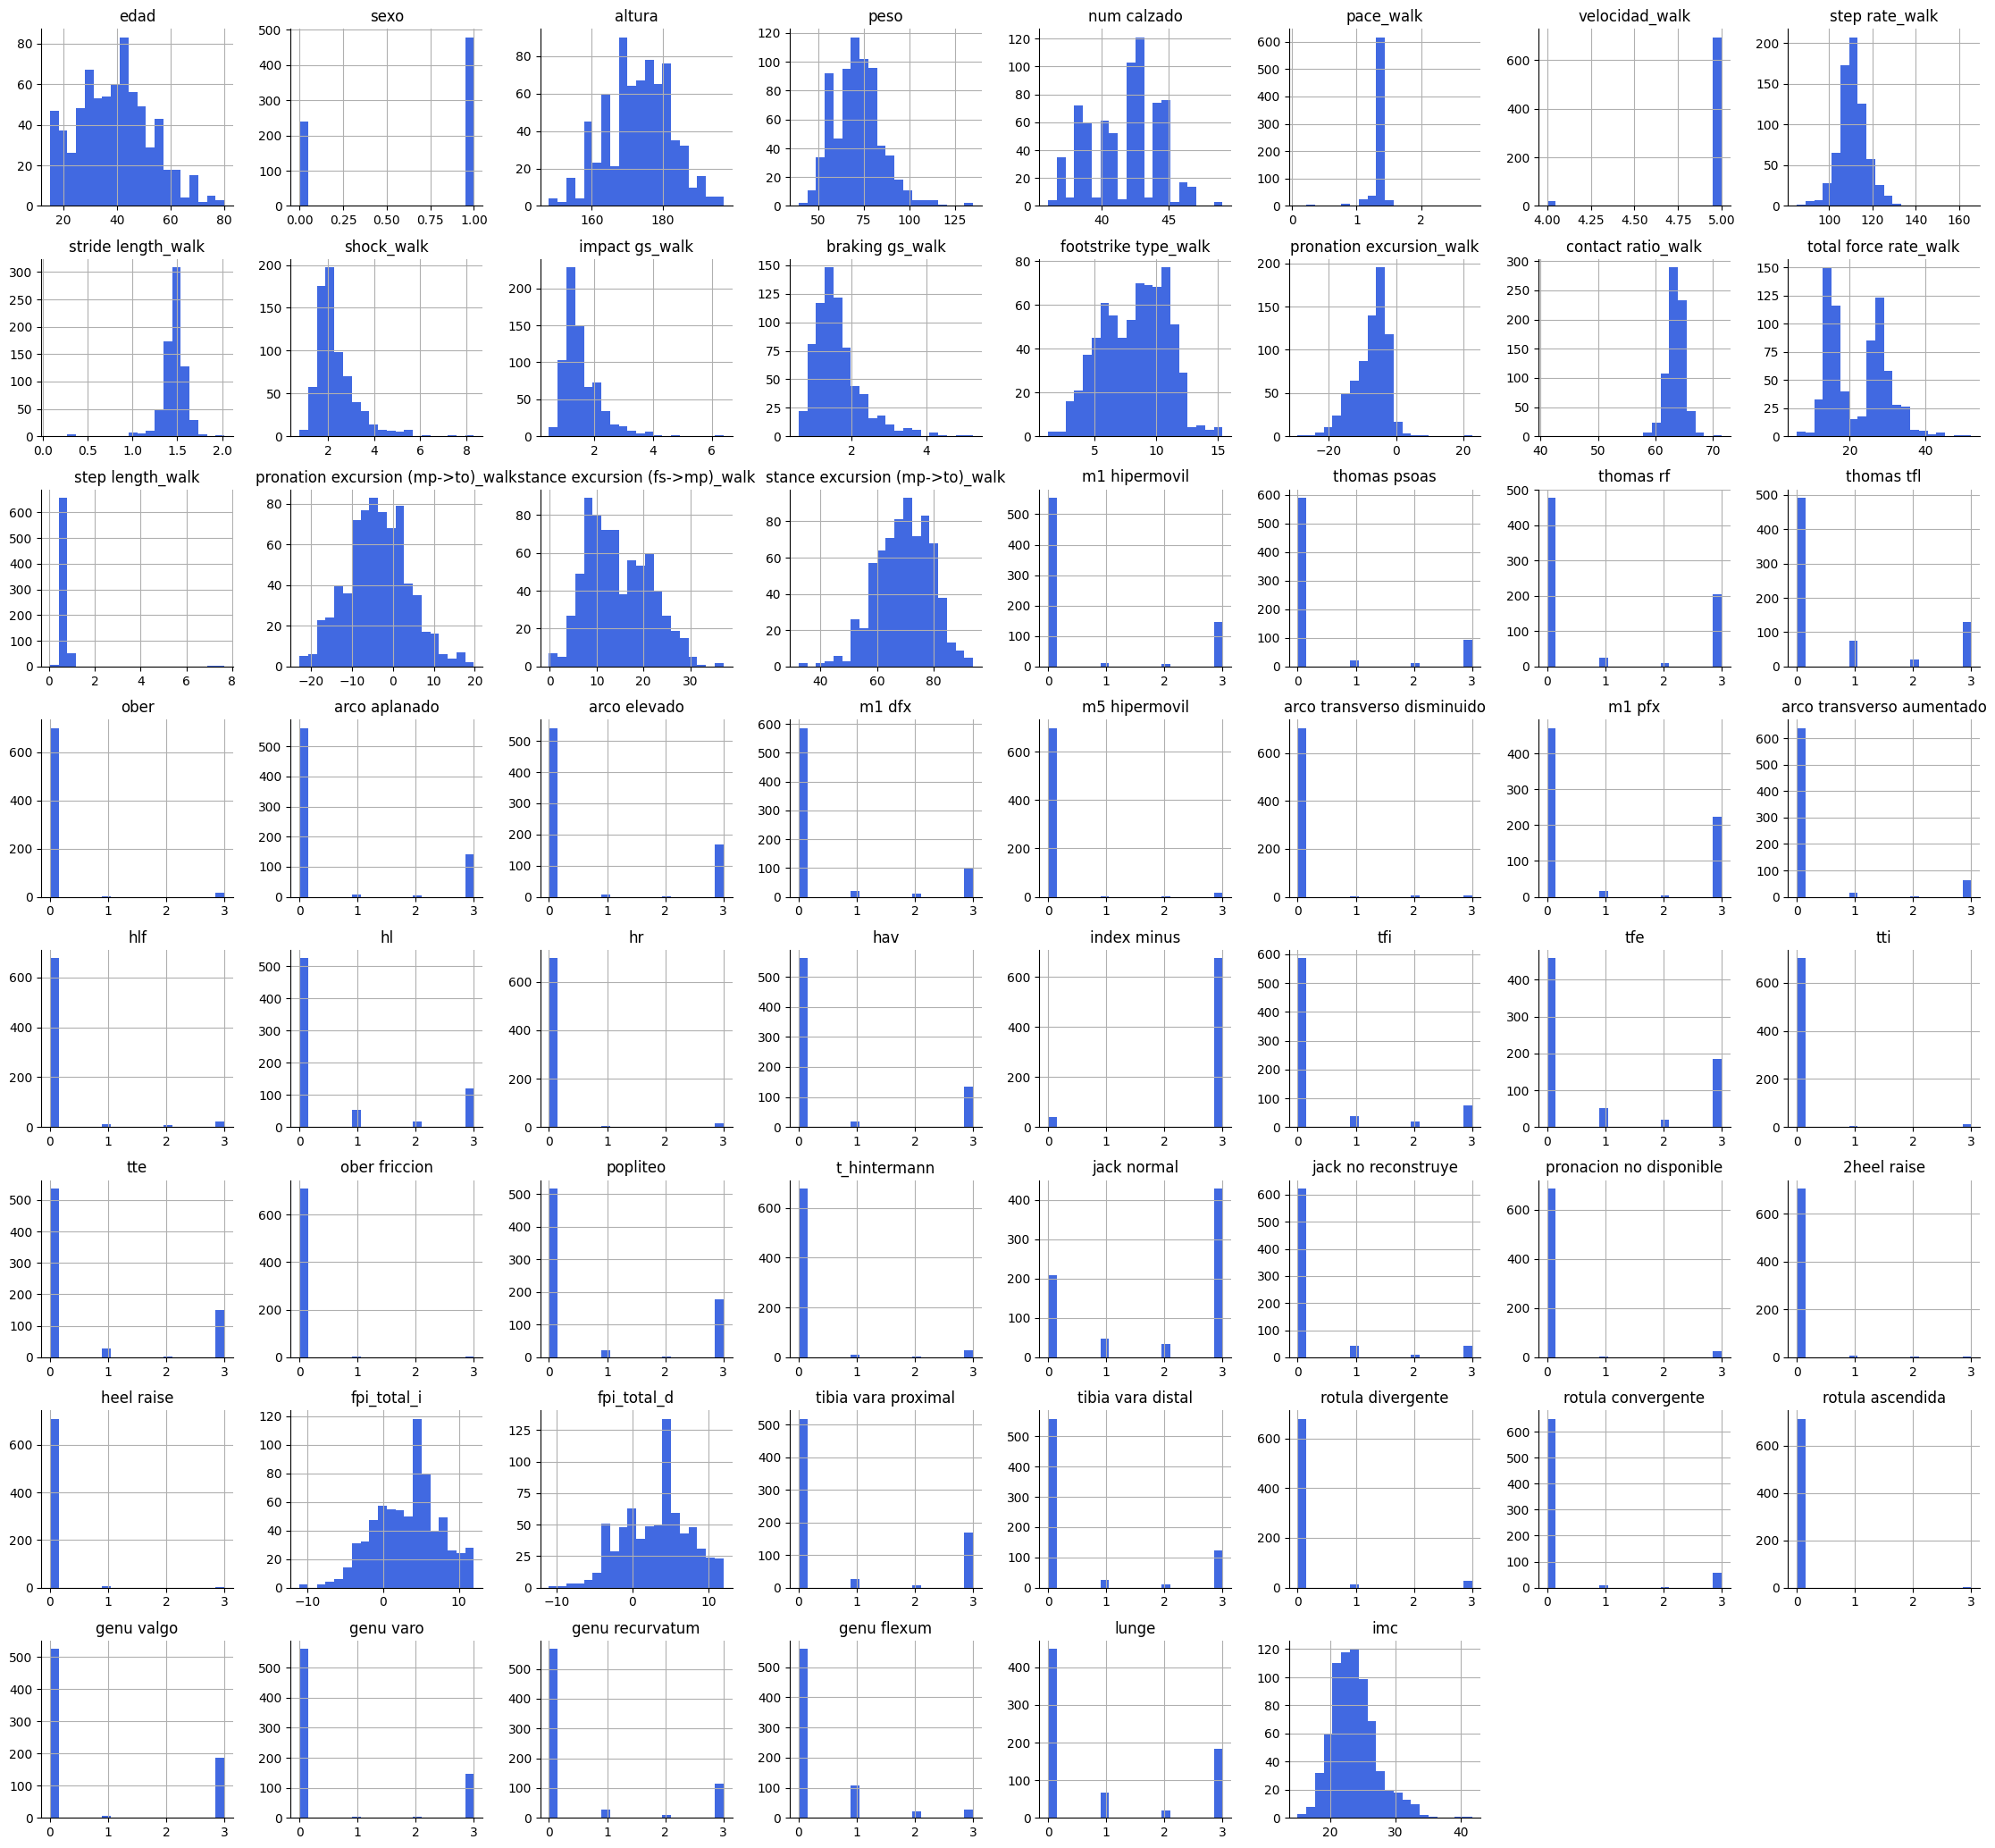

In [10]:
df.hist(bins=20, figsize=(28,26), color='royalblue')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

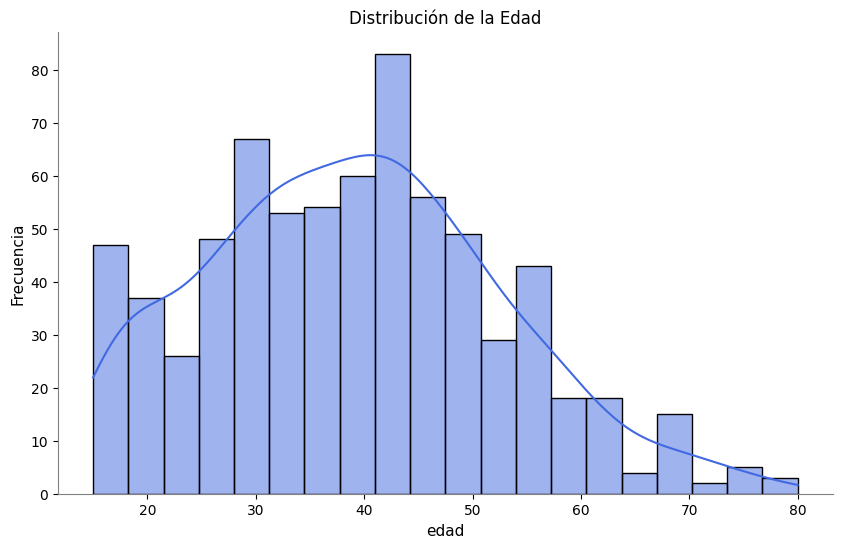

In [11]:
plot_histogram(df, 'edad', bins=20, title="Distribución de la Edad", xlabel="edad", ylabel="Frecuencia")

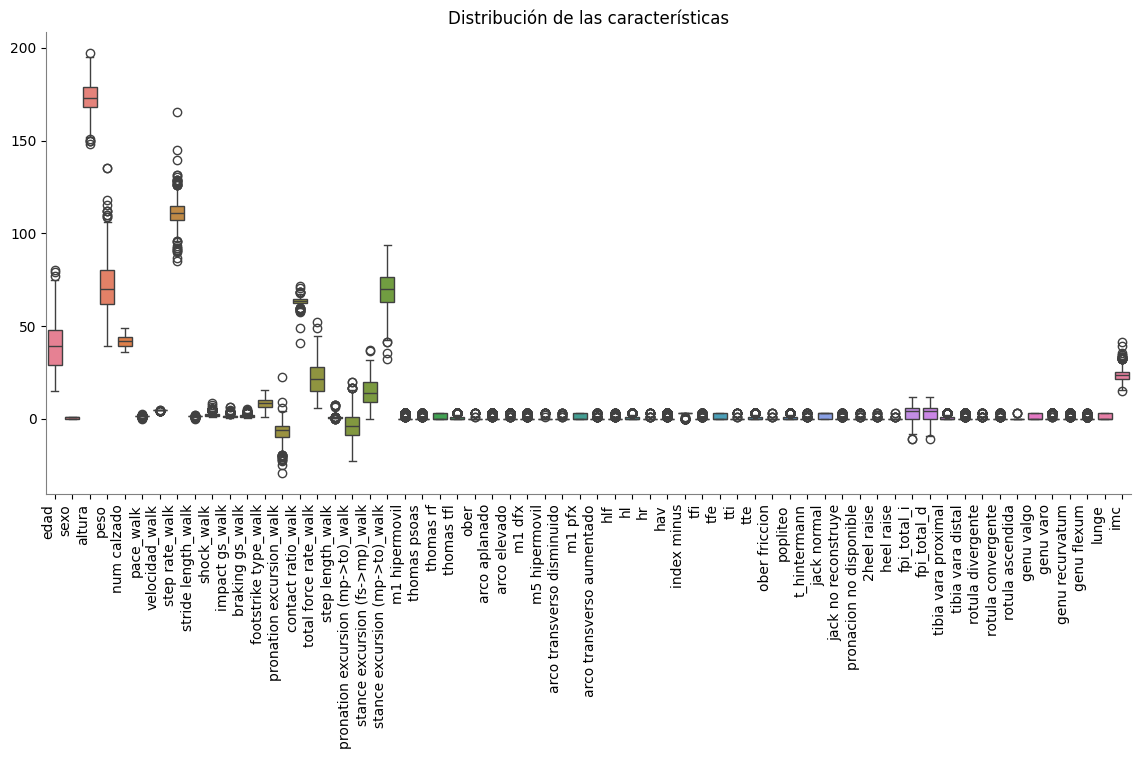

In [12]:
plot_boxplot(df)

## 3. Relaciones entre Variables

- **Matriz de Correlación:** Calcula la matriz de correlación para identificar relaciones lineales entre las variables cuantitativas.
- **Scatter Plots:** Para visualizar la relación entre pares de variables.

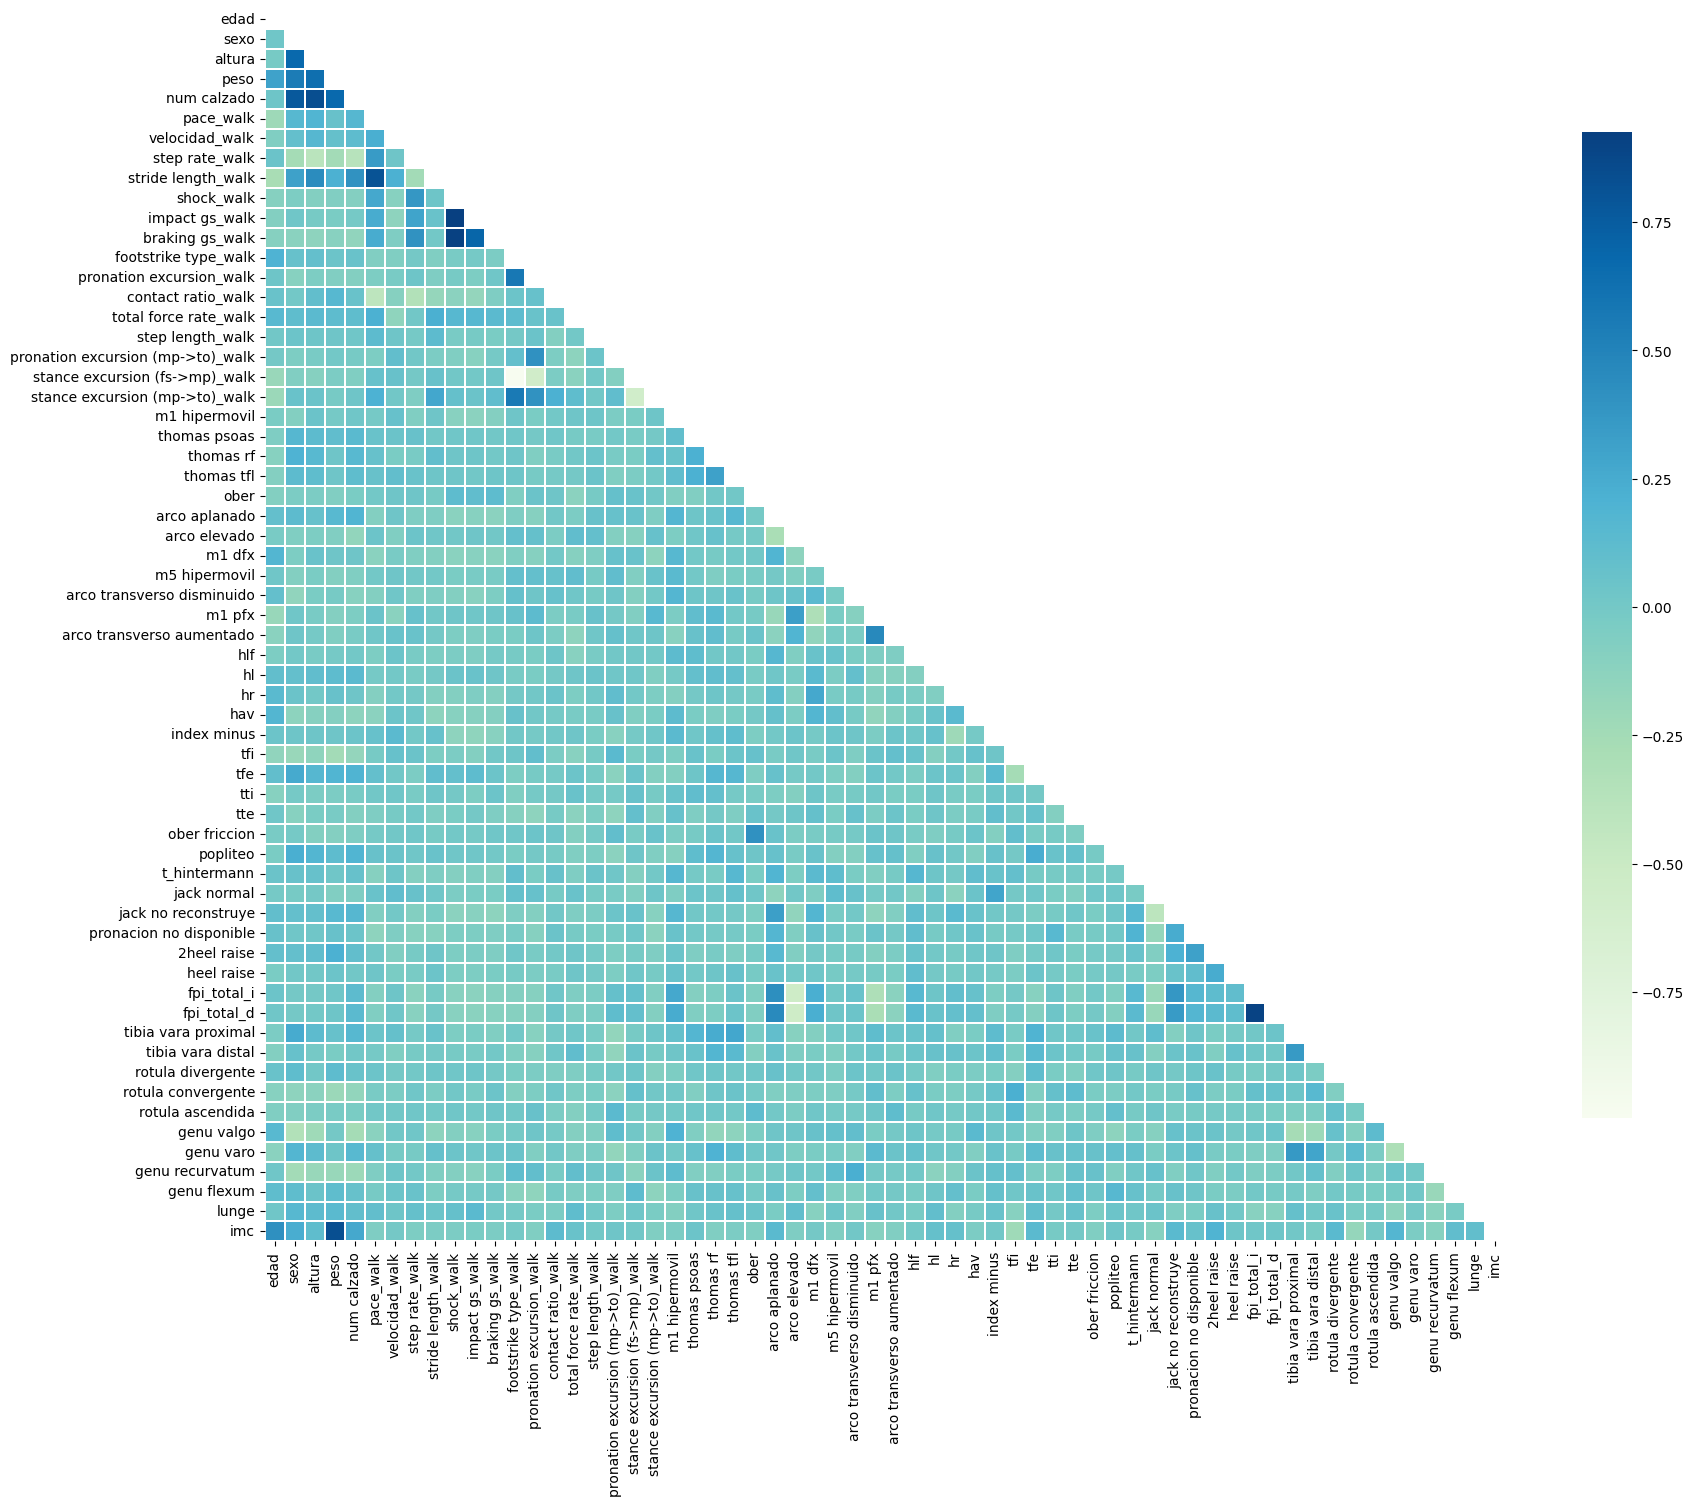

In [13]:
plot_heatmap(df.select_dtypes(include=['number']).corr(), figsize=(20, 16), cmap="GnBu", title='', annot=False)

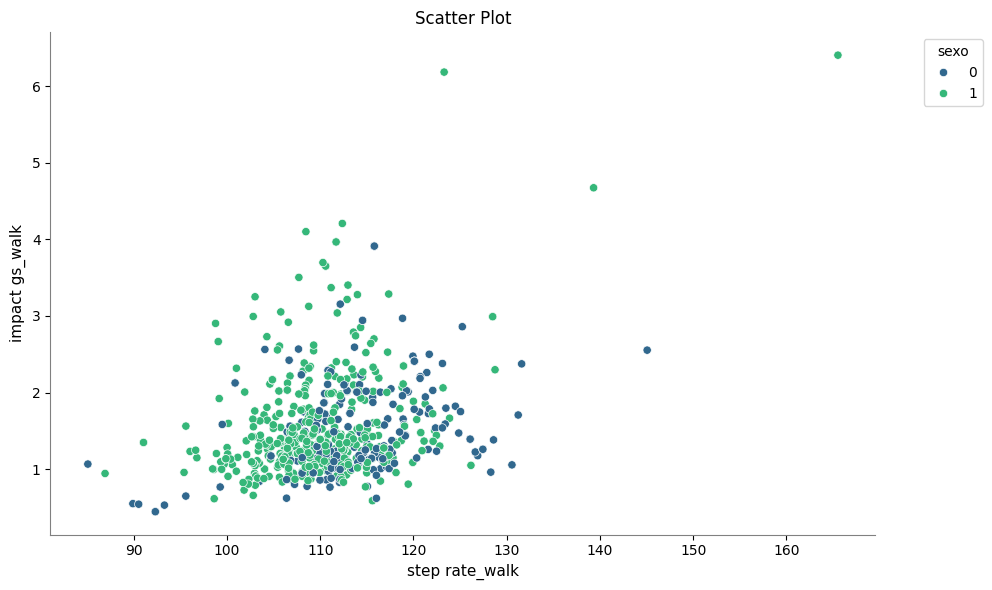

In [14]:
plot_scatter_with_hue(df, 'step rate_walk', 'impact gs_walk', 'sexo', xlabel='step rate_walk', ylabel= 'impact gs_walk')

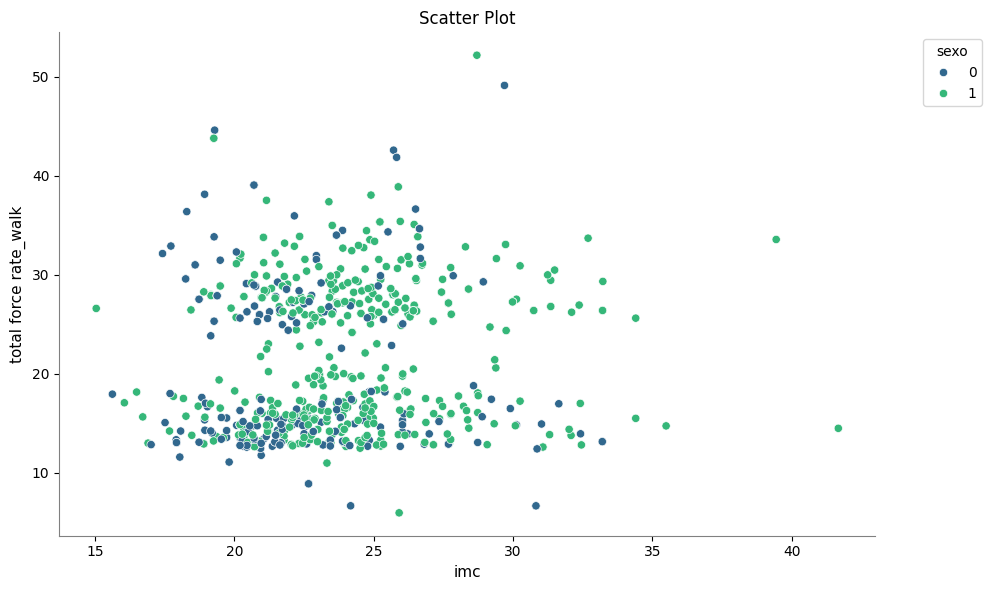

In [15]:
plot_scatter_with_hue(df, 'imc', 'total force rate_walk', 'sexo', xlabel='imc', ylabel= 'total force rate_walk')

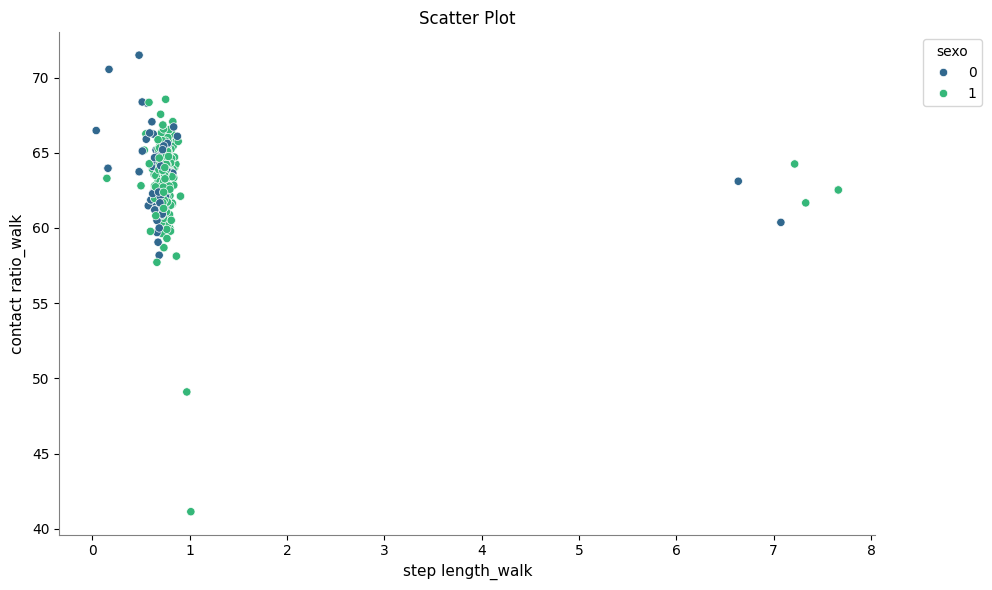

In [16]:
plot_scatter_with_hue(df, 'step length_walk', 'contact ratio_walk', 'sexo', xlabel='step length_walk', ylabel= 'contact ratio_walk')

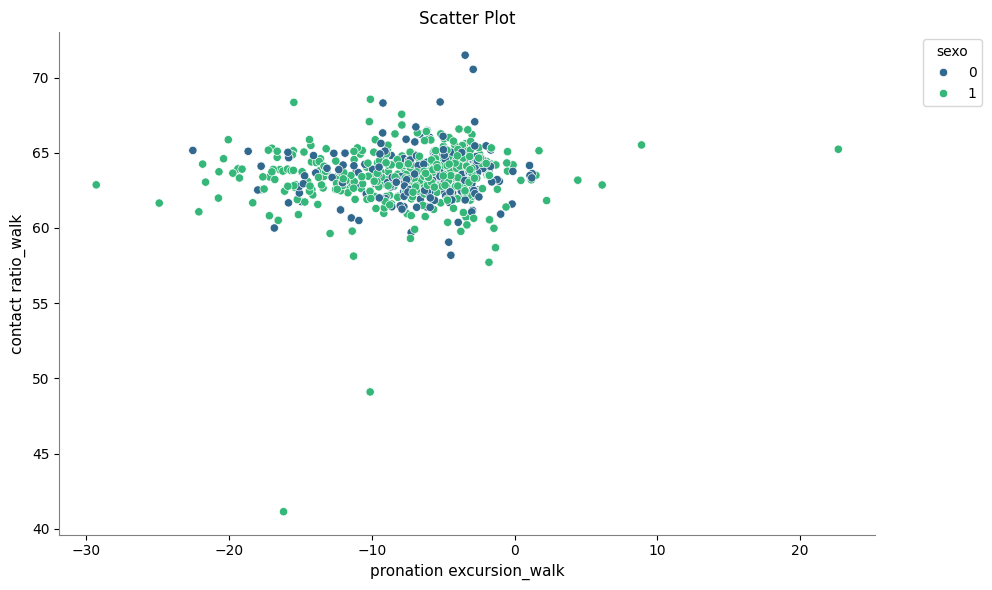

In [17]:
plot_scatter_with_hue(df, 'pronation excursion_walk', 'contact ratio_walk', 'sexo', xlabel='pronation excursion_walk', ylabel= 'contact ratio_walk')

## 4. Análisis de Variables Categóricas

- **Tablas de Contingencia:** Para variables categóricas como 'sexo', 'articulacion', 'localizacion', etc.
- **Gráficos de Barras:** Para visualizar la frecuencia de cada categoría.

In [18]:
contingency_table(df, 'sexo', 'lado')

(lado    b    d    i  no especificado
 sexo                                
 0      74   90   73                2
 1     140  162  160               16,
 5.212990711506615,
 0.15684898277814974)

In [19]:
contingency_table(df, 'sexo', 'articulacion')

(articulacion  cadera  espalda  muslo  pie  pierna  rodilla  sin afectacion  \
 sexo                                                                         
 0                 20        6      9   87      26       54               2   
 1                 40       11     11  115      50      144              14   
 
 articulacion  tobillo  
 sexo                   
 0                  35  
 1                  93  ,
 18.361197710570206,
 0.01044240227598514)

In [20]:
contingency_table(df, 'sexo', 'localizacion')

(localizacion  anterior  anterolateral  anteromedial  anteroposterior  \
 sexo                                                                   
 0                   34              6             1                4   
 1                   96              6             7                5   
 
 localizacion  dorsal distal  dorsal proximal  lateral  lumbar  medial  \
 sexo                                                                    
 0                         2                2       45       6      32   
 1                         7                0       61      11      72   
 
 localizacion  mediolateral  no especificado  plantar  plantar distal  \
 sexo                                                                   
 0                        4                2       12              32   
 1                        2               15       16              39   
 
 localizacion  plantar proximal  posterior  posterolateral  posteromedial  
 sexo                                 

In [21]:
contingency_table(df, 'sexo', 'zona afectada')

(zona afectada  cadera_lateral  cadera_lateral_d  lumbar_b  lumbar_d  lumbar_i  \
 sexo                                                                            
 0                           5                 7         5         4         3   
 1                           6                 3        18         4         8   
 
 zona afectada  otro  pie-tobillo_anterior  pie-tobillo_lateral_b  \
 sexo                                                               
 0                11                     8                      9   
 1                23                    14                      4   
 
 zona afectada  pie-tobillo_lateral_d  pie-tobillo_lateral_i  \
 sexo                                                          
 0                                  7                      4   
 1                                 12                      9   
 
 zona afectada  pie-tobillo_medial_b  pie-tobillo_medial_d  \
 sexo                                                        
 0        

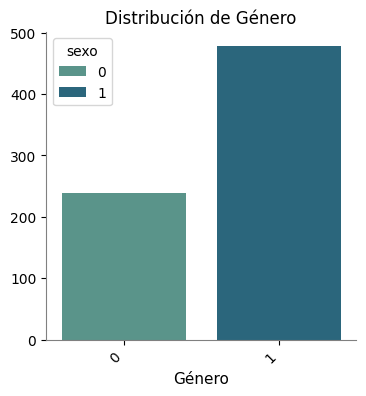

In [22]:
plot_count(df, 'sexo', title="Distribución de Género", xlabel="Género", ylabel="", figsize=(4, 4), palette="crest")

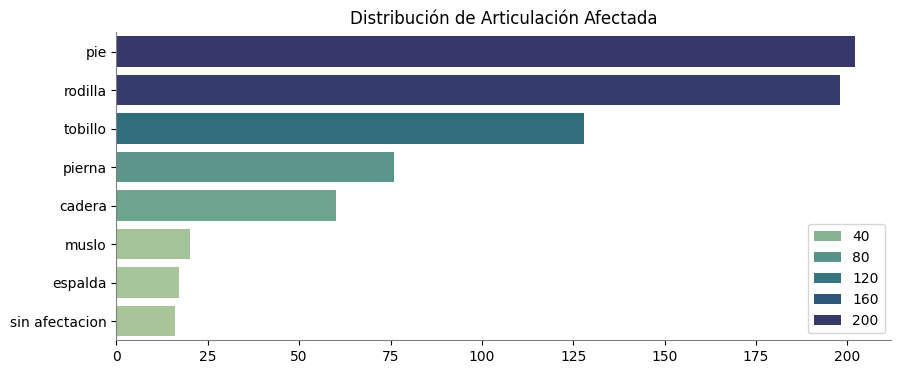

In [23]:
plot_count_horizontal(df, 'articulacion', title="Distribución de Articulación Afectada", xlabel="", ylabel="", figsize=(10, 4), palette="crest")

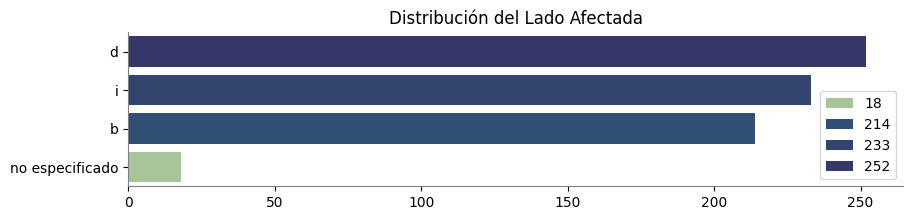

In [24]:
plot_count_horizontal(df, 'lado', title="Distribución del Lado Afectada", xlabel="", ylabel="", figsize=(10, 2), palette="crest")

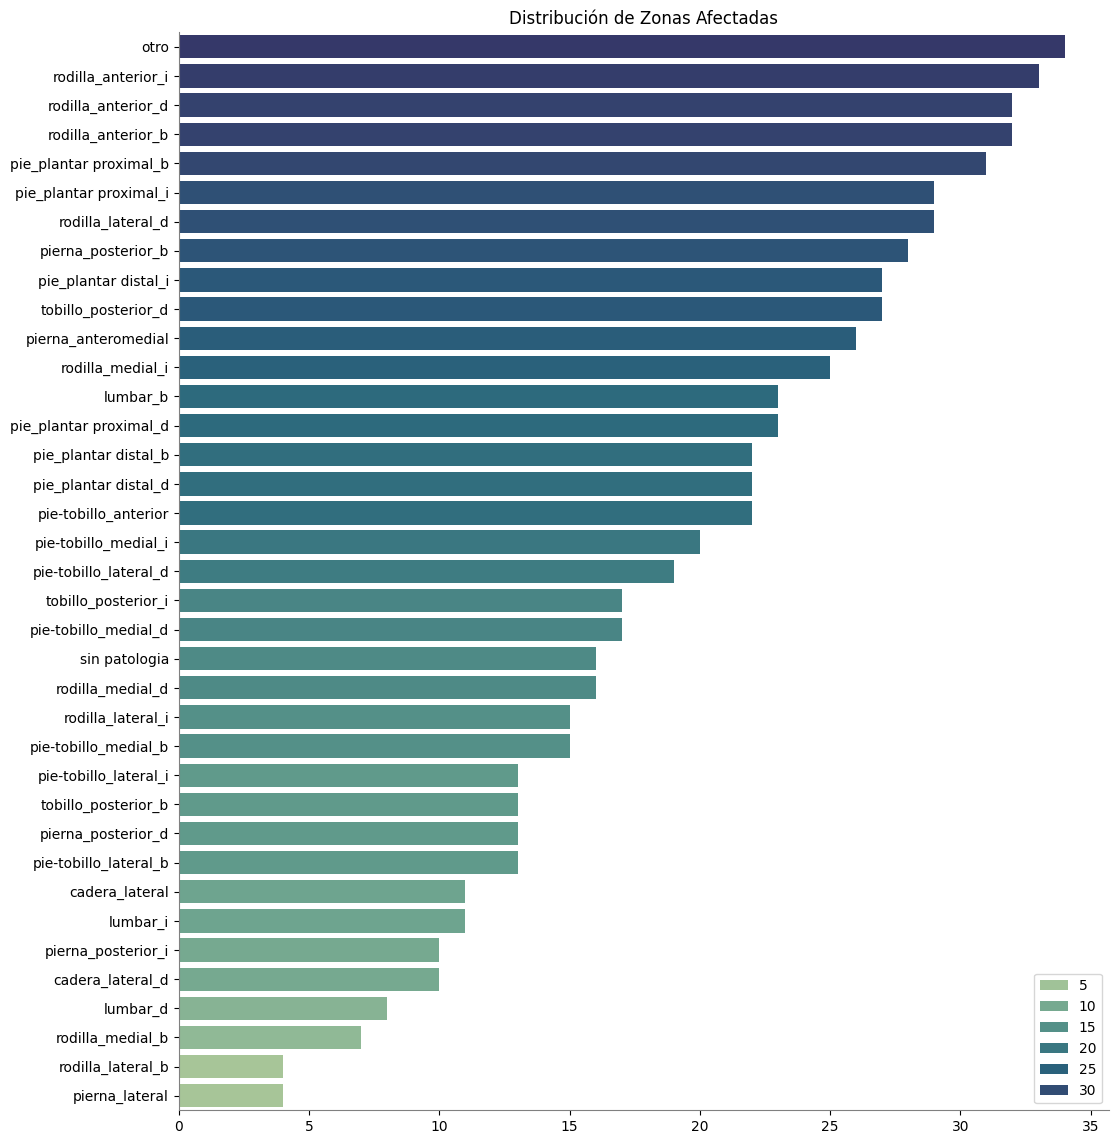

In [25]:
plot_count_horizontal(df, 'zona afectada', title="Distribución de Zonas Afectadas", xlabel="", ylabel="", figsize=(12, 14), palette="crest")

## 5. Análisis de Datos Faltantes

- **Mapa de Datos Faltantes:** Visualización de datos faltantes para cada variable.
- **Porcentaje de Datos Faltantes:** Para cada variable.

In [26]:
calculate_missing_percentage(df, df.columns)

Porcentaje de datos faltantes por columna:


edad                                 0.0
pronacion no disponible              0.0
hlf                                  0.0
hl                                   0.0
hr                                   0.0
hav                                  0.0
index minus                          0.0
tfi                                  0.0
tfe                                  0.0
tti                                  0.0
tte                                  0.0
ober friccion                        0.0
popliteo                             0.0
t_hintermann                         0.0
jack normal                          0.0
jack no reconstruye                  0.0
2heel raise                          0.0
sexo                                 0.0
heel raise                           0.0
fpi_total_i                          0.0
fpi_total_d                          0.0
tibia vara proximal                  0.0
tibia vara distal                    0.0
rotula divergente                    0.0
rotula convergen

## 6. Análisis de Outliers

- **Z-Score:** Para detectar outliers en variables cuantitativas.
- **IQR (Interquartile Range):** Para identificar outliers utilizando el rango intercuartil.

In [27]:
# Lista de columnas a analizar
columns_to_analyze = ['edad', 'altura', 'peso', 'step rate_walk', 'stance excursion (mp->to)_walk', 'imc']

# Calcular Z-score para cada columna
for column in columns_to_analyze:
    df[f'zscore_{column}'] = stats.zscore(df[column])

# Identificar outliers con Z-score (absoluto valor mayor que 3)
outliers_zscore = df[(df[[f'zscore_{col}' for col in columns_to_analyze]].abs() > 3).any(axis=1)]
print("Outliers identificados usando Z-score:")
print(outliers_zscore[['edad', 'altura', 'peso', 'imc', 'num calzado']])
print("\nOutliers identificados usando Z-score:")
print(outliers_zscore[['step rate_walk', 'stance excursion (mp->to)_walk', 'pace_walk', 'velocidad_walk']])

Outliers identificados usando Z-score:
     edad  altura   peso    imc  num calzado
64     59     189  112.0  31.35         45.0
65     59     189  112.0  31.35         45.0
76     38     190  118.0  32.69         48.9
79     46     186  112.0  32.37         46.0
96     70     167   72.0  25.82         41.0
302    47     178  109.0  34.40         45.0
318    62     160   76.0  29.69         40.0
325    55     185  135.0  39.44         49.0
459    65     158   64.0  25.64         38.0
460    30     178  109.0  34.40         44.0
499    77     172   77.0  26.03         43.0
554    38     173   70.0  23.39         42.0
561    63     180  115.0  35.49         45.0
573    80     162   68.0  25.91         40.0
574    50     168   81.0  28.70         41.0
605    69     148   64.0  29.22         37.0
653    43     180  135.0  41.67         43.0

Outliers identificados usando Z-score:
     step rate_walk  stance excursion (mp->to)_walk  pace_walk  velocidad_walk
64       106.157533             

In [28]:
# Calcular outliers usando IQR para cada columna
outliers_list = []
for column in columns_to_analyze:
    outliers = calculate_iqr_outliers(df, column)
    outliers_list.append(outliers)

outliers_iqr = pd.concat(outliers_list).drop_duplicates() # Concatenar todos los DataFrames de outliers
print("Outliers identificados usando IQR:")
print(outliers_iqr[['edad', 'altura', 'peso', 'imc', 'num calzado']])

Outliers identificados usando IQR:
     edad  altura   peso    imc  num calzado
499    77     172   77.0  26.03         43.0
573    80     162   68.0  25.91         40.0
683    79     192   99.0  26.86         45.0
86     31     197   96.0  24.74         47.0
373    28     151   48.0  21.05         37.5
410    15     150   47.0  20.89         37.0
429    69     150   52.0  23.11         37.0
501    60     150   65.0  28.89         38.0
605    69     148   64.0  29.22         37.0
64     59     189  112.0  31.35         45.0
76     38     190  118.0  32.69         48.9
79     46     186  112.0  32.37         46.0
236    47     182  110.0  33.21         45.0
302    47     178  109.0  34.40         45.0
325    55     185  135.0  39.44         49.0
460    30     178  109.0  34.40         44.0
561    63     180  115.0  35.49         45.0
653    43     180  135.0  41.67         43.0
52     61     165   70.0  25.71         39.0
96     70     167   72.0  25.82         41.0
220    31     188   

In [29]:
print("\nOutliers identificados usando Z-score:")
print(outliers_iqr[['step rate_walk', 'stance excursion (mp->to)_walk', 'pace_walk', 'velocidad_walk']])


Outliers identificados usando Z-score:
     step rate_walk  stance excursion (mp->to)_walk  pace_walk  velocidad_walk
499       86.923970                       43.687092   0.849484             5.0
573       98.865584                       54.273442   0.242982             5.0
683       99.428813                       42.668760   0.973527             5.0
86        98.462874                       81.523120   1.362213             5.0
373      113.023097                       73.044736   1.359207             5.0
410      123.108031                       57.473303   1.367729             5.0
429      121.430863                       55.607465   1.355425             5.0
501      121.575505                       56.980946   1.369280             5.0
605       93.289036                       32.311573   0.786142             5.0
64       106.157533                       86.437212   1.377640             5.0
76        98.592556                       64.802748   1.328473             5.0
79       106

### Análisis de Outliers Identificados Usando Z-score

El análisis de outliers utilizando el Z-score ha revelado varias observaciones que se desvían significativamente de la media en nuestro conjunto de datos. Los valores de Z-score nos ayudan a identificar puntos que se encuentran más allá de tres desviaciones estándar de la media, lo que indica una posible anormalidad en estos registros. A continuación, se presenta un análisis detallado de estos outliers para diferentes características.

- **Edad**: Las edades de 30 y 80 años están destacadas como outliers. Esto podría indicar que la mayoría de nuestra muestra está en un rango de edad más estrecho, y estos valores representan extremos.

- **Altura**: Individuos con alturas de 148 cm y 190 cm son considerados outliers. Esto sugiere que la distribución de altura en nuestra muestra es más homogénea, con estas alturas representando extremos raros.

- **Peso**: Pesos de 64 kg y 135 kg son marcados como outliers. Similar a la altura, esto indica que la mayoría de los pesos en nuestra muestra están agrupados más cerca de la media, con estos pesos extremos siendo poco comunes.

- **IMC**: Un IMC de 41.67 es identificado como un outlier. Este valor es significativamente alto, sugiriendo la presencia de casos de obesidad severa en la muestra.

- **Step Rate** *(Frecuencia de Paso)*: Valores como 85.079444 y 165.522552 indican una variabilidad extrema en la frecuencia de paso. Esto podría representar diferencias significativas en los estilos de marcha, posiblemente debido a condiciones médicas o diferencias en la eficiencia de la marcha.

- **Stance Excursion (mp->to)_Walk** *(Excursión de la Fase de Apoyo)*: Valores que van desde 32.311573 hasta 86.437212 muestran una variabilidad en la excursión de la fase de apoyo. Esto podría ser indicativo de variaciones en la movilidad articular o en la estabilidad durante la marcha.

- **Velocidad y Ritmo**:mLa mayoría de los individuos tienen una `velocidad_walk` constante de 5, excepto algunos valores que son considerablemente más bajos o más altos. Esto sugiere que la mayoría de la muestra camina a una velocidad similar, con algunos outliers caminando significativamente más rápido o más lento.
   
- **Pace (Ritmo)**: El ritmo también muestra variabilidad con outliers tanto en valores altos (por ejemplo, 2.793561) como bajos (por ejemplo, 0.242982), lo que podría reflejar diferencias en la cadencia o la longitud del paso.

### Consideraciones para la Siguiente Fase

- **Tratamiento de Outliers**: Decidir si los outliers deben ser eliminados, transformados o mantenidos. Esto dependerá de si estos valores extremos son errores de medición, valores válidos que representan subgrupos importantes, o simplemente anormalidades sin relevancia.

- **Impacto en los Modelos**: Evaluar cómo los outliers afectan los modelos estadísticos y de machine learning. Los outliers pueden sesgar los resultados y reducir la precisión de los modelos predictivos.

- **Análisis Adicional**: Realizar análisis más profundos para entender las causas subyacentes de estos outliers. Por ejemplo, investigar si hay condiciones médicas o demográficas que expliquen las variaciones extremas.

- **Consideraciones de Negocio**: Evaluar la relevancia de estos outliers en el contexto del problema de negocio. Por ejemplo, si estamos analizando patrones de marcha para diseñar calzado ortopédico, los outliers pueden representar casos que requieren soluciones personalizadas.

## 7. Análisis de Varianza y Pruebas T

- **ANOVA:** Para comparar las medias de más de dos grupos en variables cuantitativas.
- **Pruebas T de Student:** Para comparar las medias entre dos grupos.

In [30]:
perform_anova(df, 'altura', 'articulacion')

,sum_sq,df,F,PR(>F)
C(articulacion),1068.589701,7.0,1.960913,0.057907
Residual,55195.150885,709.0,NaN,NaN


In [31]:
perform_anova(df, 'peso', 'articulacion')

,sum_sq,df,F,PR(>F)
C(articulacion),1087.821862,7.0,0.881131,0.520867
Residual,125044.705335,709.0,NaN,NaN


In [32]:
perform_anova(df, 'imc', 'articulacion')

,sum_sq,df,F,PR(>F)
C(articulacion),105.834461,7.0,1.294857,0.249922
Residual,8278.533617,709.0,NaN,NaN


In [33]:
perform_anova(df, 'imc', 'localizacion')

,sum_sq,df,F,PR(>F)
C(localizacion),273.373214,16.0,1.474551,0.102595
Residual,8110.994864,700.0,NaN,NaN


In [34]:
perform_anova(df, 'fpi_total_d', 'lado')

,sum_sq,df,F,PR(>F)
C(lado),140.011227,3.0,2.517387,0.057105
Residual,13218.468550,713.0,NaN,NaN


In [35]:
perform_anova(df, 'pace_walk', 'velocidad_walk')

,sum_sq,df,F,PR(>F)
C(velocidad_walk),0.763273,2.0,19.623528,5.053524e-09
Residual,13.885811,714.0,NaN,NaN


In [36]:
perform_anova(df, 'lunge', 'articulacion')

,sum_sq,df,F,PR(>F)
C(articulacion),23.536249,7.0,2.037634,0.048213
Residual,1169.928186,709.0,NaN,NaN


In [37]:
perform_ttest(df, 'velocidad_walk', 'sexo')

(-2.322899484640086, 0.020464285069665)

In [38]:
perform_ttest(df, 'contact ratio_walk', 'sexo')

(-0.22045410424431205, 0.8255804443477659)

In [39]:
perform_ttest(df, 'pronation excursion_walk', 'sexo')

(2.6224896341784327, 0.008914856640760863)

In [40]:
perform_ttest(df, 'footstrike type_walk', 'sexo')

(-2.0267100162043, 0.04306272522972027)

In [41]:
perform_ttest(df, 'step length_walk', 'sexo')

(-1.1566393034499853, 0.24780605006360568)

In [42]:
perform_ttest(df, 'imc', 'sexo')

(-6.544009879336766, 1.142091602701502e-10)